## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

W0804 12:08:07.498250 15244 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 12:08:07.526175 15244 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 12:08:07.531162 15244 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# optimizer = keras.optimizers.Adam(lr=0.001)
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0804 12:08:07.616458 15244 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0804 12:08:07.630418 15244 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          # epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0804 12:08:07.818952 15244 deprecation.py:323] From D:\Software\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0804 12:08:07.892749 15244 deprecation_wrapper.py:119] From D:\Software\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.8516 - acc: 0.3400 - val_loss: 1.6910 - val_acc: 0.4029
Epoch 2/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.6461 - acc: 0.4197 - val_loss: 1.7622 - val_acc: 0.3900
Epoch 3/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.5572 - acc: 0.4473 - val_loss: 1.5449 - val_acc: 0.4448
Epoch 4/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.4901 - acc: 0.4740 - val_loss: 1.5451 - val_acc: 0.4420
Epoch 5/500
50000/50000 [==============================] - 4s 73us/step - loss: 1.4471 - acc: 0.4904 - val_loss: 1.5014 - val_acc: 0.4645
Epoch 6/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3995 - acc: 0.5032 - val_loss: 1.5913 - val_acc: 0.4364
Epoch 7/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3677 - acc: 0.5176 - val_loss: 1.5087 -

50000/50000 [==============================] - 3s 67us/step - loss: 0.2897 - acc: 0.8986 - val_loss: 2.3072 - val_acc: 0.5230
Epoch 60/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.2936 - acc: 0.8961 - val_loss: 2.4584 - val_acc: 0.5142
Epoch 61/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2887 - acc: 0.8967 - val_loss: 2.4498 - val_acc: 0.5082
Epoch 62/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2696 - acc: 0.9060 - val_loss: 2.4760 - val_acc: 0.5266
Epoch 63/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2703 - acc: 0.9046 - val_loss: 2.4548 - val_acc: 0.5204
Epoch 64/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.2522 - acc: 0.9120 - val_loss: 2.6491 - val_acc: 0.4992
Epoch 65/500
50000/50000 [==============================] - 3s 67us/step - loss: 0.2376 - acc: 0.9170 - val_loss: 2.4774 - val_acc: 0.5284
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0780 - acc: 0.9729 - val_loss: 3.6156 - val_acc: 0.5332
Epoch 119/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0774 - acc: 0.9729 - val_loss: 3.6685 - val_acc: 0.5332
Epoch 120/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0586 - acc: 0.9801 - val_loss: 3.5655 - val_acc: 0.5399
Epoch 121/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0585 - acc: 0.9795 - val_loss: 3.5897 - val_acc: 0.5341
Epoch 122/500
50000/50000 [==============================] - 3s 70us/step - loss: 0.0702 - acc: 0.9757 - val_loss: 3.6823 - val_acc: 0.5315
Epoch 123/500
50000/50000 [==============================] - 3s 69us/step - loss: 0.0807 - acc: 0.9715 - val_loss: 3.6221 - val_acc: 0.5345
Epoch 124/500
50000/50000 [==============================] - 3s 68us/step - loss: 0.0641 - acc: 0.9783 - val_loss: 3.7661 - val_acc: 0.5274
Epoch 125/500
50000/

50000/50000 [==============================] - 3s 68us/step - loss: 3.9577e-04 - acc: 1.0000 - val_loss: 4.0282 - val_acc: 0.5527
Epoch 177/500
50000/50000 [==============================] - 3s 69us/step - loss: 3.8753e-04 - acc: 1.0000 - val_loss: 4.0306 - val_acc: 0.5508
Epoch 178/500
50000/50000 [==============================] - 3s 69us/step - loss: 3.8114e-04 - acc: 1.0000 - val_loss: 4.0324 - val_acc: 0.5506
Epoch 179/500
50000/50000 [==============================] - 3s 70us/step - loss: 3.5741e-04 - acc: 1.0000 - val_loss: 4.0396 - val_acc: 0.5526
Epoch 180/500
50000/50000 [==============================] - 4s 71us/step - loss: 3.5028e-04 - acc: 1.0000 - val_loss: 4.0442 - val_acc: 0.5521
Epoch 181/500
50000/50000 [==============================] - 3s 70us/step - loss: 3.4788e-04 - acc: 1.0000 - val_loss: 4.0471 - val_acc: 0.5518
Epoch 182/500
50000/50000 [==============================] - 3s 69us/step - loss: 3.3149e-04 - acc: 1.0000 - val_loss: 4.0518 - val_acc: 0.5525
Epoch 

Epoch 233/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.6439e-04 - acc: 1.0000 - val_loss: 4.1452 - val_acc: 0.5527
Epoch 234/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.6326e-04 - acc: 1.0000 - val_loss: 4.1478 - val_acc: 0.5529
Epoch 235/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.6190e-04 - acc: 1.0000 - val_loss: 4.1487 - val_acc: 0.5535
Epoch 236/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.6081e-04 - acc: 1.0000 - val_loss: 4.1488 - val_acc: 0.5528
Epoch 237/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.5969e-04 - acc: 1.0000 - val_loss: 4.1516 - val_acc: 0.5522
Epoch 238/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.5824e-04 - acc: 1.0000 - val_loss: 4.1526 - val_acc: 0.5533
Epoch 239/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.5652e-04 - acc: 1.0000 - val_loss: 4.1522 - val_acc:

Epoch 290/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.1285e-04 - acc: 1.0000 - val_loss: 4.1984 - val_acc: 0.5540
Epoch 291/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.1218e-04 - acc: 1.0000 - val_loss: 4.2012 - val_acc: 0.5538
Epoch 292/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.1147e-04 - acc: 1.0000 - val_loss: 4.1997 - val_acc: 0.5536
Epoch 293/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.1144e-04 - acc: 1.0000 - val_loss: 4.2009 - val_acc: 0.5542
Epoch 294/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.1049e-04 - acc: 1.0000 - val_loss: 4.2022 - val_acc: 0.5532
Epoch 295/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.0976e-04 - acc: 1.0000 - val_loss: 4.2039 - val_acc: 0.5534
Epoch 296/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.0963e-04 - acc: 1.0000 - val_loss: 4.2035 - val_acc:

Epoch 347/500
50000/50000 [==============================] - 3s 70us/step - loss: 8.7423e-05 - acc: 1.0000 - val_loss: 4.2349 - val_acc: 0.5539
Epoch 348/500
50000/50000 [==============================] - 3s 69us/step - loss: 8.7085e-05 - acc: 1.0000 - val_loss: 4.2347 - val_acc: 0.5532
Epoch 349/500
50000/50000 [==============================] - 3s 70us/step - loss: 8.6667e-05 - acc: 1.0000 - val_loss: 4.2352 - val_acc: 0.5537
Epoch 350/500
50000/50000 [==============================] - 3s 70us/step - loss: 8.6211e-05 - acc: 1.0000 - val_loss: 4.2360 - val_acc: 0.5539
Epoch 351/500
50000/50000 [==============================] - 3s 69us/step - loss: 8.5866e-05 - acc: 1.0000 - val_loss: 4.2374 - val_acc: 0.5539
Epoch 352/500
50000/50000 [==============================] - 3s 70us/step - loss: 8.5717e-05 - acc: 1.0000 - val_loss: 4.2369 - val_acc: 0.5541
Epoch 353/500
50000/50000 [==============================] - 4s 70us/step - loss: 8.5658e-05 - acc: 1.0000 - val_loss: 4.2373 - val_acc:

Epoch 404/500
50000/50000 [==============================] - 3s 69us/step - loss: 7.1960e-05 - acc: 1.0000 - val_loss: 4.2611 - val_acc: 0.5539
Epoch 405/500
50000/50000 [==============================] - 3s 69us/step - loss: 7.1627e-05 - acc: 1.0000 - val_loss: 4.2620 - val_acc: 0.5541
Epoch 406/500
50000/50000 [==============================] - 4s 71us/step - loss: 7.1497e-05 - acc: 1.0000 - val_loss: 4.2628 - val_acc: 0.5539
Epoch 407/500
50000/50000 [==============================] - 4s 71us/step - loss: 7.1247e-05 - acc: 1.0000 - val_loss: 4.2631 - val_acc: 0.5539
Epoch 408/500
50000/50000 [==============================] - 4s 71us/step - loss: 7.0985e-05 - acc: 1.0000 - val_loss: 4.2622 - val_acc: 0.5533
Epoch 409/500
50000/50000 [==============================] - 4s 71us/step - loss: 7.0816e-05 - acc: 1.0000 - val_loss: 4.2639 - val_acc: 0.5538
Epoch 410/500
50000/50000 [==============================] - 3s 69us/step - loss: 7.0604e-05 - acc: 1.0000 - val_loss: 4.2638 - val_acc:

Epoch 461/500
50000/50000 [==============================] - 3s 69us/step - loss: 6.1287e-05 - acc: 1.0000 - val_loss: 4.2841 - val_acc: 0.5539
Epoch 462/500
50000/50000 [==============================] - 3s 70us/step - loss: 6.1224e-05 - acc: 1.0000 - val_loss: 4.2841 - val_acc: 0.5546
Epoch 463/500
50000/50000 [==============================] - 4s 70us/step - loss: 6.0925e-05 - acc: 1.0000 - val_loss: 4.2845 - val_acc: 0.5538
Epoch 464/500
50000/50000 [==============================] - 3s 70us/step - loss: 6.0919e-05 - acc: 1.0000 - val_loss: 4.2850 - val_acc: 0.5541
Epoch 465/500
50000/50000 [==============================] - 4s 70us/step - loss: 6.0685e-05 - acc: 1.0000 - val_loss: 4.2854 - val_acc: 0.5542
Epoch 466/500
50000/50000 [==============================] - 4s 70us/step - loss: 6.0566e-05 - acc: 1.0000 - val_loss: 4.2860 - val_acc: 0.5541
Epoch 467/500
50000/50000 [==============================] - 3s 69us/step - loss: 6.0398e-05 - acc: 1.0000 - val_loss: 4.2858 - val_acc:

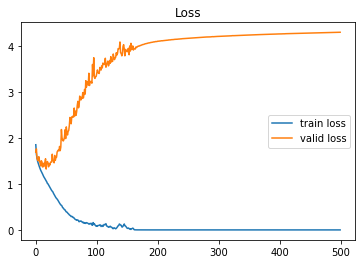

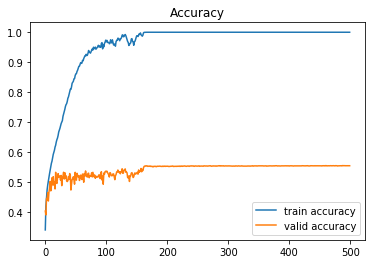

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()